# 1. Подготовительныеоперации

## 1.1. Инициализация

In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [2]:
PIC_SIZE = (10, 6)  # Размер графика
fontSize=15 # Размер шрифта графиков
matplotlib.rcParams.update({'font.size': fontSize})
fontType='' # Тип шрифта графиков
# Цвет графиков
tColor=[0,0.447,0.741] # Временная область
tColorLight=[0.3, 0.7, 0.9] # Временная область
Color0='r' # Эталонные сигналы
fColor=[1, 0.4, 0] # Частотная область
eColor=[0.85, 0.325, 0.098] # Погрешности
eColorLight=[0.9, 0.9, 0.4] # Погрешности
eColorDark=[0.635, 0.078, 0.184] # Погрешности

## 1.2. Формирование значений основных параметров

In [3]:
BarkerLength=7 # Длина поседовательности Баркера
PNpoly = np.array([1, 0, 0, 0, 0, 1, 1])  # Задающий полином (z^6+z+1)
A=2 # Амплитуда сигнала
fd = 100 # Частота дискретизации,Гц
f=2 # Несущая частота,Гц
Qchip=7 # Количество чипов
Tchip = 1 # Длительность импульса,с
Nchip = Tchip*fd # Количество отсчетов в одном чипе
tmin=0 # Начальное время моделирования,с
tmax=Qchip*Tchip # Конечное время моделирования,с
td = np.linspace(tmin,tmax,Nchip*Qchip) # Формирование массива абсцисс точек графика

## 1.3. Сигнал несущей частоты

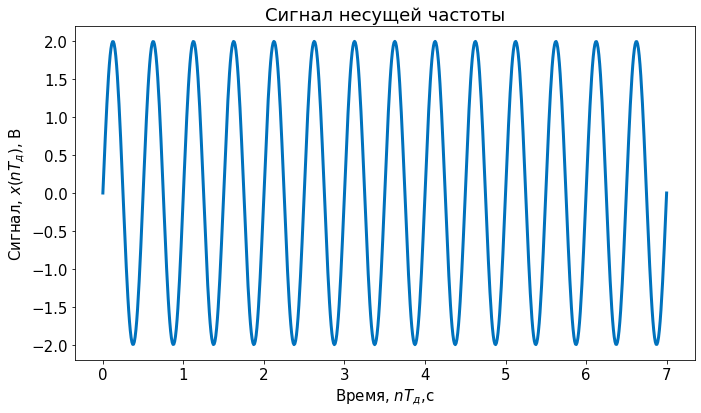

In [4]:
xc = A*np.sin(td*2*np.pi*f) # Формирование значений
fig, ax =plt.subplots() # Формирование графика
fig.set_size_inches(PIC_SIZE, forward=True) # Размер гафика
ax.plot(td, xc, color=tColor, linewidth=3)
ax.set_xlabel('Время, $nT_д$,с') # Надпись оси абсцисс
ax.set_ylabel('Сигнал, $x(nT_д)$, В') # Надпись оси ординат
ax.set_title('Сигнал несущей частоты') # Заголовок

# Интервал настройки, чтобы предотвратить отсечение ylabel
fig.tight_layout()
plt.show()

# 2. Фазоманипулированный последовательностью Баркера сигнал

## 2.1. Последовательность Баркера

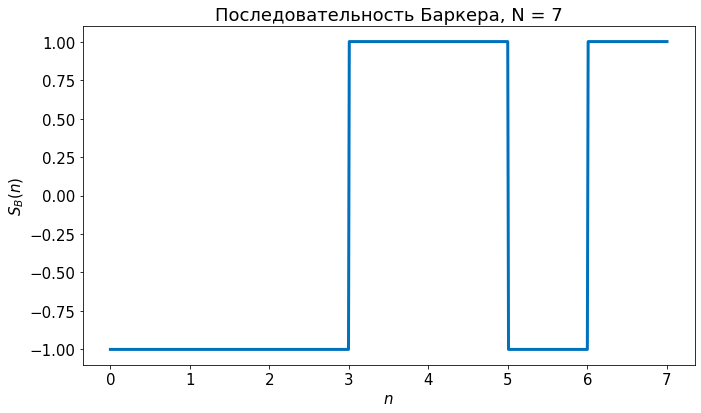

In [5]:
# Формирование последовательности Баркера заданной длины
barker = np.array([-1,-1,-1,1,1,-1,1])
# Формирование значений
seqBarker=np.array([], dtype=int)
for i in range(Qchip):
    seq=np.full_like(np.arange(Nchip), barker[i])
    seqBarker=np.concatenate([seqBarker, seq])
fig, ax =plt.subplots() # Формирование графика
fig.set_size_inches(PIC_SIZE, forward=True) # Размер гафика
ax.plot(td, seqBarker, color=tColor, linewidth=3)
ax.set_xlabel('$n$') # Надпись оси абсцисс
ax.set_ylabel('$S_B(n)$') # Надпись оси ординат
ax.set_title(f'Последовательность Баркера, N = {BarkerLength}') # Заголовок

# Интервал настройки, чтобы предотвратить отсечение ylabel
fig.tight_layout()
plt.show()

## 2.2. Модуль автокорреляционной функции последовательности Баркера

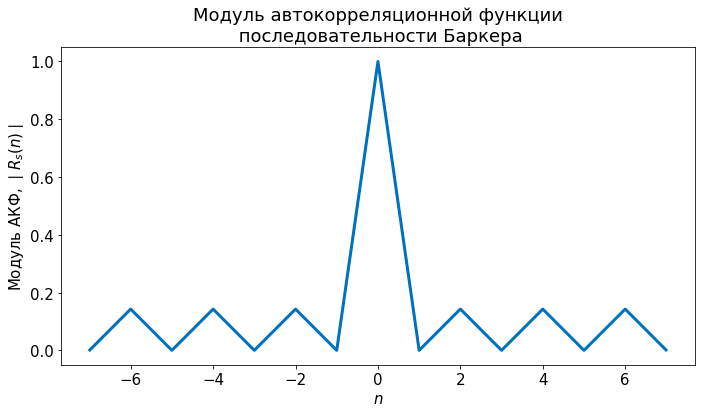

In [6]:
# Моделирование модуля автокорреляционной функции последовательности Баркера сигнала
# Формирование значений
asd = np.correlate(seqBarker,seqBarker,"full")
asd=np.abs(asd) #  Модуль АКФ
asd=asd/np.max(asd)
lb=np.arange(-seqBarker.size+1,seqBarker.size)/Nchip

fig, ax =plt.subplots() # Формирование графика
fig.set_size_inches(PIC_SIZE, forward=True) # Размер гафика
ax.plot(lb, asd, color=tColor, linewidth=3)
ax.set_xlabel('$n$') # Надпись оси абсцисс
ax.set_ylabel('Модуль АКФ, $\mid R_s(n) \mid$') # Надпись оси ординат
ax.set_title('Модуль автокорреляционной функции\n последовательности Баркера') # Заголовок

# Интервал настройки, чтобы предотвратить отсечение ylabel
fig.tight_layout()
plt.show()

## 2.3.  Фазоманипулированный последовательностью Баркера сигнал

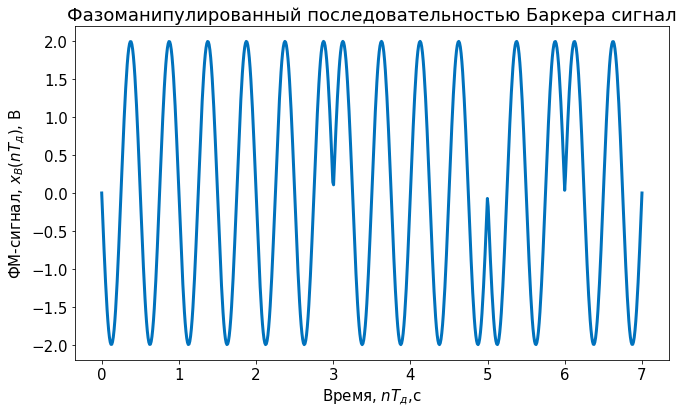

In [7]:
#  Фазоманипулированный последовательностью Баркера сигнал 
xd=xc*seqBarker # Формирование значений

fig, ax =plt.subplots() # Формирование графика
fig.set_size_inches(PIC_SIZE, forward=True) # Размер гафика
ax.plot(td, xd, color=tColor, linewidth=3)
ax.set_xlabel('Время, $nT_д$,с') # Надпись оси абсцисс
ax.set_ylabel('ФМ-сигнал, $x_B(nT_д)$, В') # Надпись оси ординат
ax.set_title('Фазоманипулированный последовательностью Баркера сигнал') # Заголовок

# Интервал настройки, чтобы предотвратить отсечение ylabel
fig.tight_layout()
plt.show()

## 2.4 Модуль автокорреляционной функции фазоманипулированного последовательностью Баркера сигнала

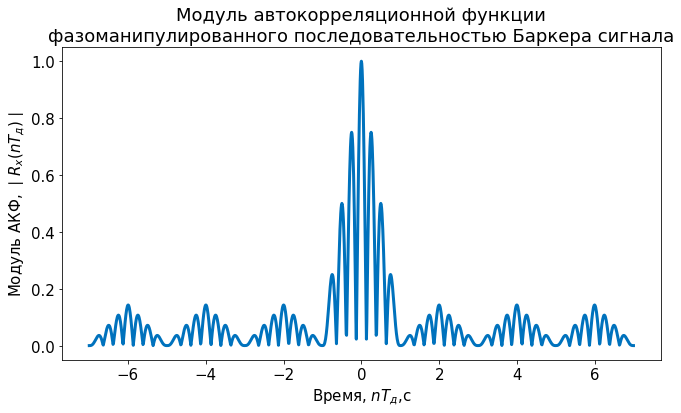

In [8]:
# Моделирование модуля автокорреляционной функции фазоманипулированного последовательностью Баркера сигнала
axd = np.correlate(xd,xd,"full")
axd=np.abs(axd) #  Модуль АКФ
axd=axd/np.max(axd)
ld=np.arange(-xd.size+1,xd.size)/Nchip

fig, ax =plt.subplots() # Формирование графика
fig.set_size_inches(PIC_SIZE, forward=True) # Размер гафика
ax.plot(ld, axd, color=tColor, linewidth=3)
ax.set_xlabel('Время, $nT_д$,с') # Надпись оси абсцисс
ax.set_ylabel('Модуль АКФ, $\mid R_x(nT_д) \mid$') # Надпись оси ординат
ax.set_title('Модуль автокорреляционной функции\n' 
             'фазоманипулированного последовательностью Баркера сигнала') # Заголовок

# Интервал настройки, чтобы предотвратить отсечение ylabel
fig.tight_layout()
plt.show()


# 3 Моделирование фазоманипулированного M-поcледовательностью сигнала

## 3.1 M-последовательность

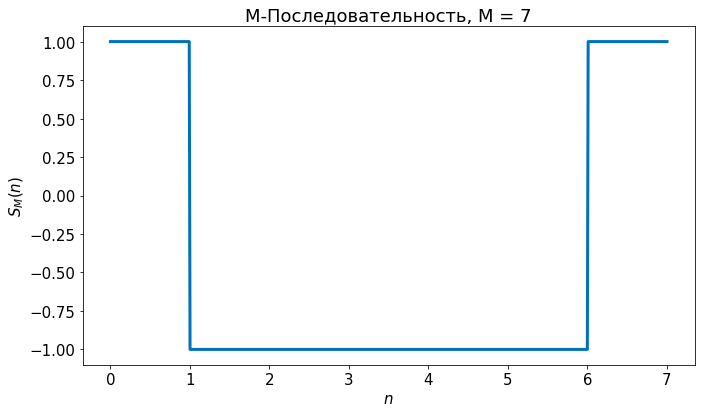

In [9]:
# Формирование последовательности M-последовательности заданной длины
pn = np.array([1,0,0,0,0,0,1])
nM=PNpoly.size
# Формирование значений
seqPN=np.array([], dtype=int)
for i in range(Qchip):
    seqElem=pn[i]
    if seqElem==0:
        seqElem=-1
    seq=np.full_like(np.arange(Nchip), seqElem)
    seqPN=np.concatenate([seqPN, seq])
fig, ax =plt.subplots() # Формирование графика
fig.set_size_inches(PIC_SIZE, forward=True) # Размер гафика
ax.plot(td, seqPN, color=tColor, linewidth=3)
ax.set_xlabel('$n$') # Надпись оси абсцисс
ax.set_ylabel('$S_M(n)$') # Надпись оси ординат
ax.set_title(f'M-Последовательность, M = {nM}') # Заголовок

# Интервал настройки, чтобы предотвратить отсечение ylabel
fig.tight_layout()
plt.show()

## 3.2 Модуль автокорреляционной функции M-последовательности

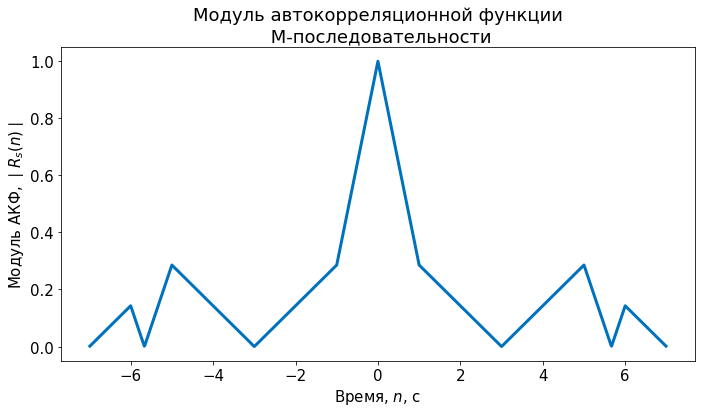

In [10]:
# Моделирование модуля автокорреляционной функции фазоманипулированного M-последовательностью сигнала
# Формирование значений
asd = np.correlate(seqPN,seqPN,"full")
asd=np.abs(asd) #  Модуль АКФ
asd=asd/np.max(asd)
lb=np.arange(-seqPN.size+1,seqPN.size)/Nchip

fig, ax =plt.subplots() # Формирование графика
fig.set_size_inches(PIC_SIZE, forward=True) # Размер гафика
ax.plot(lb, asd, color=tColor, linewidth=3)
ax.set_xlabel('Время, $n$, с') # Надпись оси абсцисс
ax.set_ylabel('Модуль АКФ, $\mid R_s(n) \mid$') # Надпись оси ординат
ax.set_title('Модуль автокорреляционной функции\n M-последовательности') # Заголовок

# Интервал настройки, чтобы предотвратить отсечение ylabel
fig.tight_layout()
plt.show()

## 3.3 Фазоманипулированный M-последовательностью сигнал

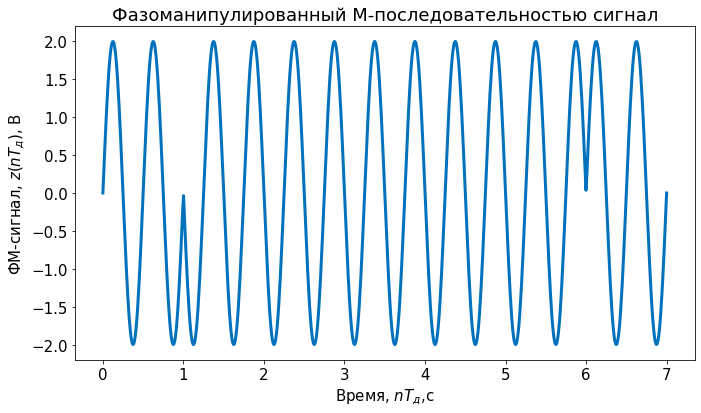

In [11]:
# Фазоманипулированный M-последовательностью сигнал 
xd=xc*seqPN # Формирование значений

fig, ax =plt.subplots() # Формирование графика
fig.set_size_inches(PIC_SIZE, forward=True) # Размер гафика
ax.plot(td, xd, color=tColor, linewidth=3)
ax.set_xlabel('Время, $nT_д$,с') # Надпись оси абсцисс
ax.set_ylabel('ФМ-сигнал, $z(nT_д)$, В') # Надпись оси ординат
ax.set_title('Фазоманипулированный M-последовательностью сигнал') # Заголовок

# Интервал настройки, чтобы предотвратить отсечение ylabel
fig.tight_layout()
plt.show()

## 3.4 Модуль автокорреляционной функции фазоманипулированного M-последовательностью сигнала

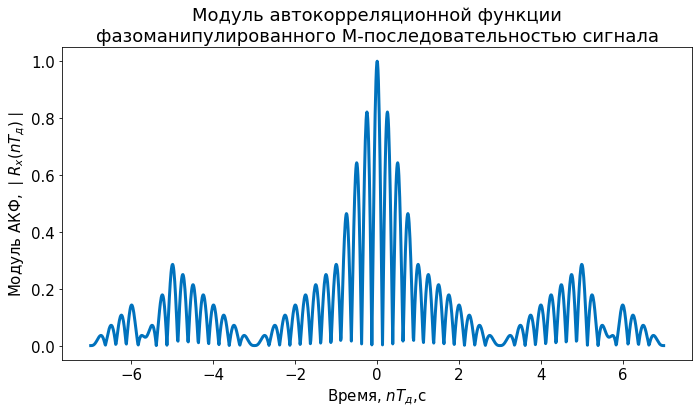

In [12]:
# Моделирование модуля автокорреляционной функции фазоманипулированного M-последовательностью сигнала
axd = np.correlate(xd,xd,"full")
axd=np.abs(axd) #  Модуль АКФ
axd=axd/np.max(axd)
ld=np.arange(-xd.size+1,xd.size)/Nchip

fig, ax =plt.subplots() # Формирование графика
fig.set_size_inches(PIC_SIZE, forward=True) # Размер гафика
ax.plot(ld, axd, color=tColor, linewidth=3)
ax.set_xlabel('Время, $nT_д$,с') # Надпись оси абсцисс
ax.set_ylabel('Модуль АКФ, $\mid R_x(nT_д) \mid$') # Надпись оси ординат
ax.set_title('Модуль автокорреляционной функции\n' 
             'фазоманипулированного M-последовательностью сигнала') # Заголовок

# Интервал настройки, чтобы предотвратить отсечение ylabel
fig.tight_layout()
plt.show()